Deep Learning Practical 3B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankleboot']

In [3]:
df1 = pd.read_csv(r'fashion-mnist_train.csv')

In [4]:
df1

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = df1.drop("label", axis=1).values
y_train = df1["label"].values

In [6]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)

x_train shape:  (60000, 784)
y_train shape:  (60000,)


In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [8]:
df2 = pd.read_csv(r'fashion-mnist_test.csv')

In [9]:
df2

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
x_test = df2.drop("label", axis=1).values
y_test = df2["label"].values

In [ ]:
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_test shape:  (10000, 784)
y_test shape:  (10000,)


In [ ]:
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   4   0   0   0   0   0  62  61  21  29  23  51 136  61
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  88 201 228 225 255 115  62 137 255 235 222
  255 135   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  47 252 234 238 224 215 215 229 108 180 207 214 224
  231 249 254  45   0   0   0   0   0   0]
 [  0   0   1   0   0 214 222 210 213 224 225 217 220 254 233 219 221 217
  223 221 240 254   0   0   1   0   0   0]
 [  1   0   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219
  213 226 211 237 150   0   0   0   0   0]
 [  0   2   0   0 237 222 215 207 210 212 213 206 214 213 214 21

In [ ]:
y_train[0]

2

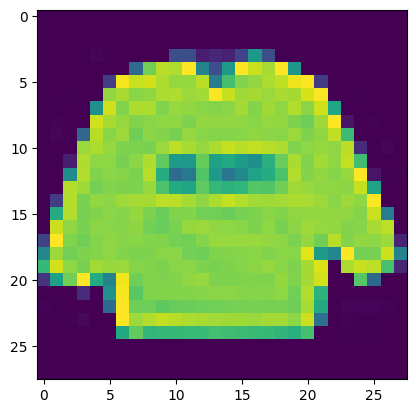

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_test[10]

array([[  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  83, 142,  50,
          0,   0,   0,   0,  85, 145,  31,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 215, 210, 208, 255,
        254, 225, 227, 255, 221, 199, 211, 129,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0, 105, 213, 187, 187, 204,
        223, 230, 227, 221, 188, 183, 188, 188,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 206, 185, 193, 189,
        230, 219, 229, 205, 180, 186, 181, 201,  61,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 206, 214, 190, 185, 177,
        204, 244, 215, 174, 181, 177, 187, 209, 118,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 196, 219, 178, 184, 183,
        177, 222, 181, 173, 184, 173, 203, 210, 177,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_test[10]

3

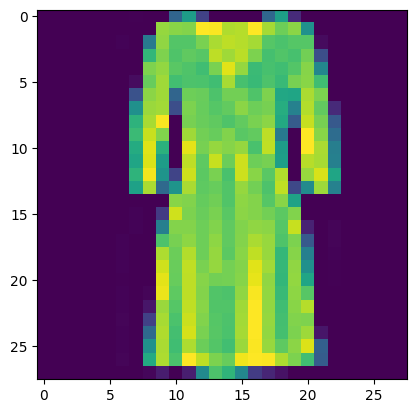

In [ ]:
plt.imshow(x_test[10])

Normalization & Reshaping

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
print("Train Shape :",x_train.shape)
print("Test Shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

Train Shape : (60000, 28, 28, 1)
Test Shape : (10000, 28, 28, 1)
y_train shape : (60000,)
y_test shape : (10000,)


Building our Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.fit(x_train, y_train, epochs=3, verbose=1,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 101s 53ms/step - loss: 0.4479 - accuracy: 0.8380 - val_loss: 0.3343 - val_accuracy: 0.8768
Epoch 2/3
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3031 - accuracy: 0.8891 - val_loss: 0.2799 - val_accuracy: 0.8962
Epoch 3/3
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2575 - accuracy: 0.9047 - val_loss: 0.2611 - val_accuracy: 0.9034


Testing our model

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


In [ ]:
import numpy as np
index=10
print(predictions[index])
final_value=np.argmax(predictions[index])
print("Actual label :",y_test[index])
print("Predicted label :",final_value)
print("Class :",class_names[final_value])

[1.98299764e-04 1.18286493e-06 4.90898892e-05 9.99566495e-01
 2.26852026e-05 2.34607842e-06 1.48132909e-04 2.98226610e-07
 1.12240905e-05 1.39511769e-07]
Actual label : 3
Predicted label : 3
Class : Dress


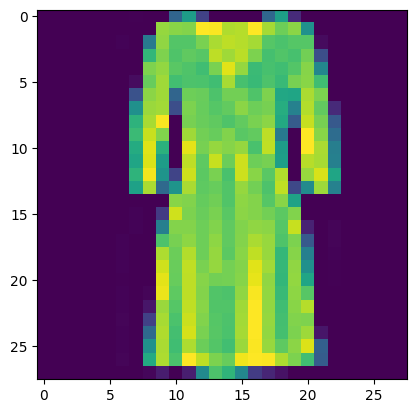

In [ ]:
plt.imshow(x_test[10])

Check Accuracy

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss :",loss)
print("Accuracy (Test Data) :",accuracy*100)

313/313 [==============================] - 4s 12ms/step - loss: 0.2611 - accuracy: 0.9034
Loss : 0.2610899806022644
Accuracy (Test Data) : 90.34000039100647
